# AI Learning 07 - 1. Linear Regression

### Train test split

In [ ]:
# training set과 validation set을 나누기 위해서 train_test_split 함수를 호출한다.
from sklearn.model_selection import train_test_split

In [ ]:
# feature들 중에서 SalePrice와 상관관계가 높은 feature 15개를 추출했다.
df_features[-16:-1].index.tolist()

['OpenPorchSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'Fireplaces',
 'YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

In [ ]:
# 위의 feature들의 값들을 X에 넣어주고, SalePrice의 값을 y에 넣어준다.
X = df_processed[df_features[-16:-1].index.tolist()]
y = df_processed['SalePrice']

In [ ]:
X.shape, y.shape

((1460, 15), (1460,))

In [ ]:
# train_test_split()을 호출해서 90%로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# X_train과 X_test가 9:1의 비율로 나누어졌다.
X_train.shape, X_test.shape

((1314, 15), (146, 15))

In [ ]:
# y_train과 y_test가 9:1의 비율로 나누어졌다.
y_train.shape, y_test.shape

((1314,), (146,))

### Linear Regression

In [ ]:
# Lasso는 사이킷런의 linear model에 들어있다.
from sklearn.linear_model import Lasso

In [ ]:
model = Lasso()

In [ ]:
# data 사이즈가 얼마 안되기 때문에 학습하는데 금방 끝이 난다.
model = model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 809534762218.5767, tolerance: 787334624.1028306
  positive)


In [ ]:
# prediction을 할 땐 test set을 사용한다.
pred = model.predict(X_test)

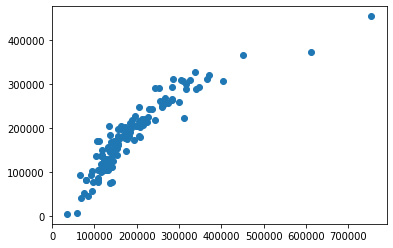

In [ ]:
# prediction해서 나온 값과 실제 정답(y_test)의 상관관계 시각화
# 어느 정도는 경향성을 찾았다는 것을 알 수 있다.
plt.scatter(y_test, pred)

### Evaluation

In [ ]:
from sklearn import metrics

In [ ]:
# 정확히 어떤 정도로 맞췄는지 정량화하기 위해서 간단한 평가 함수를 만든다.
# 이미 mean_absolute_error()와 mean_squared_error()가 있으므로 출력만 해주는 함수를 만든다.
def print_evaluate(true, predicted):
  mae = metrics.mean_absolute_error(true, predicted)
  mse = metrics.mean_squared_error(true, predicted)
  rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
  r2_square = metrics.r2_score(true, predicted)
  print('MAE: ', mae)
  print('MSE: ', mse)
  print('RMSE: ', rmse)
  print('R2 Square: ', r2_square)

In [ ]:
# 예측했던 pred와 정답인 y_test를 평가한 값 출력
print_evaluate(y_test, pred)

MAE:  23794.14269597338
MSE:  1754358902.586029
RMSE:  41885.06777583186
R2 Square:  0.80798642166732


In [ ]:
# 숫자가 크다보니 값을 보기 위해 table로 만들었음
df_results = pd.concat([y_test.reset_index(), pd.DataFrame(pred)], axis=1)

In [ ]:
# 맨 오른쪽 column이 예측값이다.
# 대체적으로 어느 정도는 가격을 맞히는 모델이 나왔다.
df_results

,index,SalePrice,0
0,892,154500,155918.012756
1,1105,325000,308343.211554
2,413,115000,109925.280172
3,522,159000,176015.061794
4,1036,315500,299781.721455
...,...,...,...
141,526,132000,119118.906907
142,101,178000,185965.751837
143,1092,136500,183903.421321
144,411,145000,140071.706967


### Label transformation

In [ ]:
# 간단히 튜닝을 하기 위한 작업
import scipy.stats as st

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


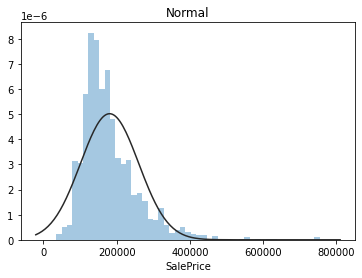

In [ ]:
# output의 범위가 적은 것이 좋고, 분포가 정규분포를 따랐을 때 fitting이 잘 되는 특성이 있다.
# 그러므로 Label이 정규분포를 따르는지 확인을 해보는 것이다.
# 분포가 완전히 일치하지 않는 것을 확인할 수 있다.
plt.figure(2); plt.title('Normal')
sns.distplot(df_processed['SalePrice'], kde=False, fit=st.norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


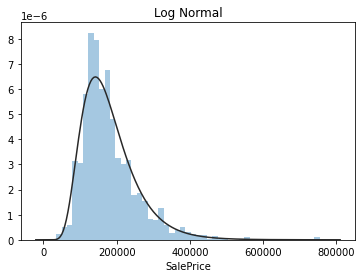

In [ ]:
# Log normal을 취하면 분포가 굉장히 일치하게 된다.
plt.figure(3); plt.title('Log Normal')
sns.distplot(df_processed['SalePrice'], kde=False, fit=st.lognorm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


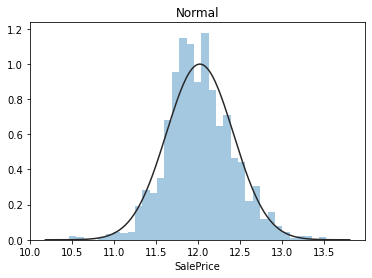

In [ ]:
# 위에서 힌트를 얻어서 y값에 Log를 취한 값을 정규분포를 따르는지 보면,
# 아래와 같이 정규분포 곡선과 로그를 취한 값이 굉장히 일치하는 것을 알 수 있다.
plt.figure(3); plt.title('Normal')
sns.distplot(np.log(df_processed['SalePrice']), kde=False, fit=st.norm)

In [ ]:
# X 값은 그대로 들어가는데 y값은 log를 취해서 넣겠다.
model = Lasso()
model = model.fit(X_train, np.log(y_train))

In [ ]:
# 그냥 prediction을 하면 log를 취한 것이 나오니까, 원상복귀 시켜주기 위한 코드
# => exponential을 취해주면 된다.
pred = np.exp(model.predict(X_test))

In [ ]:
# MAE가 23794에서 21617로 많이 감소했다.
# data feature 엔지니어링을 한다는 것은 스케일을 맞추고, 분포를 바꾸고하는 등의 과정들을 의미한다.
# 이런 과정만 거쳐도 accuracy가 확확 바뀔 수 있기 때문에, 내가 넣는 데이터가 어떤 범위에 있는지, 어떤 분포를 따르는지 항상 체크하는 것이 중요하다.
print_evaluate(y_test, pred)

MAE:  21617.328358371098
MSE:  1345501205.1928196
RMSE:  36681.07420990857
R2 Square:  0.8527356627659387
